In [1]:
from dotenv import load_dotenv

load_dotenv()


True

In [5]:
from langchain_openai import ChatOpenAI
llm = ChatOpenAI(model='gpt-4o-mini')


In [10]:
query='인프런에는 어떤강의가 있나요?'

In [2]:
pip install -q langgraph

Note: you may need to restart the kernel to use updated packages.


In [ ]:
from typing_extensions import List, TypedDict
from langchain_core.documents import Document

class AgentState(TypedDict):
    query: str
    context: List[Document]
    answer: str
    

In [4]:
from langgraph.graph import StateGraph

graph_builer = StateGraph(AgentState)

In [6]:
def generate(state:AgentState) ->AgentState:
    messages = state['messages']
    ai_message = llm.invoke(messages)
    return {'messages': [ai_message]}

In [7]:
from langgraph.graph import START, END
graph_builer.add_node('generate', generate)
graph_builer.add_edge(START,'generate')
graph_builer.add_edge('generate', END)


In [8]:
graph = graph_builer.compile()

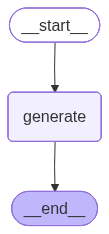

In [9]:
from IPython.display  import display, Image

display(Image(graph.get_graph().draw_mermaid_png()))

In [11]:
from langchain_core.messages import HumanMessage

initial_state = {'messages': [HumanMessage(query)]}
graph.invoke(initial_state)

{'messages': [AIMessage(content='인프런은 다양한 분야의 온라인 강의를 제공하는 플랫폼입니다. 주로 소프트웨어 개발, 데이터 분석, 인공지능, 웹 개발, 디자인, 마케팅 등 여러 분야의 강의를 찾을 수 있습니다. \n\n구체적으로는 다음과 같은 강의들이 있습니다:\n\n1. **프로그래밍**: Python, Java, JavaScript, C#, Ruby 등 다양한 언어를 배울 수 있는 강의.\n2. **웹 개발**: HTML, CSS, React, Vue.js, Node.js 등의 프레임워크와 기술을 다루는 강의.\n3. **데이터 사이언스**: 데이터 분석, 머신러닝, 통계학 등을 포함한 강의.\n4. **모바일 개발**: iOS, Android 등의 모바일 애플리케이션 개발 강의.\n5. **디자인**: UI/UX 디자인, 그래픽 디자인, 포토샵 등의 강의.\n6. **마케팅**: 디지털 마케팅, 소셜 미디어 활용, SEO 등 강의.\n\n인프런에서는 초급부터 전문가 과정까지 다양한 수준의 강의를 제공하므로, 필요에 맞게 선택할 수 있습니다. \n각 강의는 강사 소개, 강의 내용, 수강생 리뷰 등을 통해 확인할 수 있습니다.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 270, 'prompt_tokens': 18, 'total_tokens': 288, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_finge